# MRArt
- Authors: Georgia Kanli 
- Date: 2024.05.15 (Version 1)
- Purpose: MRArt
        To generate realistic degraded images, the artefacts simulation functions were applied in the raw acquisition data. The k-space of MRI data represents the spatial frequency information within the raw MRI signal. We have developed our MRI artefacts in k-space, called MRArt, which provides a set of functions that allow us to apply different types and levels of distortions to the k-space data.

In [1]:
# Import libraries

%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import MRArt


In [2]:
# filename: Path of the mrd file - string
MRArt.modify_root_mrd(rootPathMRDnew='./Data/')
subject_id = '3159'
scan_id = '37868'

In [3]:
# Load data
im, dim, par = MRArt.open_dicom(subject_id,scan_id)
ks = MRArt.get_kspace(im)
print(np.shape(im))

(15, 256, 240)


Text(0.5, 1.0, 'K-space Domain')

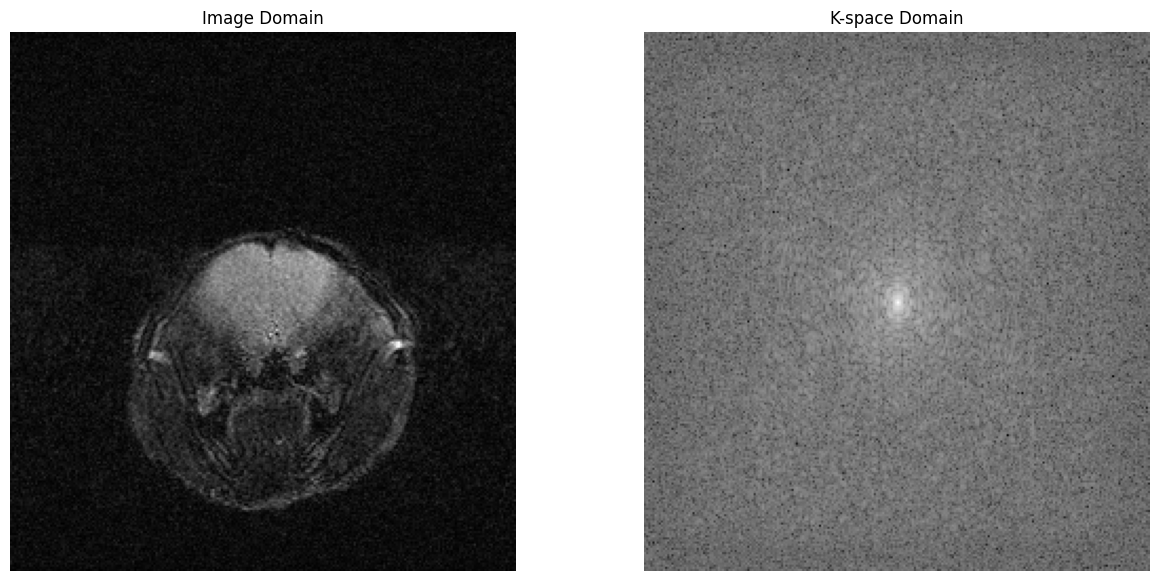

In [4]:
slice = 5
# Print original images
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(abs(im[slice,:,:]), cmap='gray')
plt.axis('off')
ax.set_title('Image Domain')
ax = fig.add_subplot(1, 2, 2)
ax.imshow(abs(np.log(ks[slice,:,:])), cmap='gray')
plt.axis('off')
ax.set_title('K-space Domain')

# Apply MRArt library

(256, 240)


(-0.5, 239.5, 255.5, -0.5)

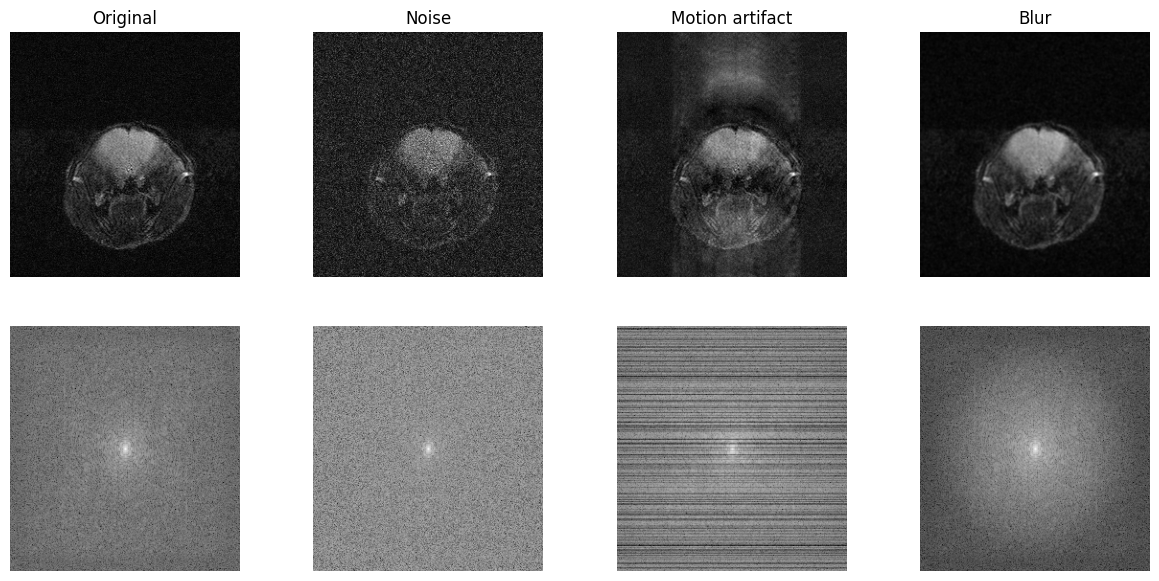

In [5]:
# Apply MRArt library
slice = 5
img = im[slice,:,:]
kspace = ks[slice,:,:]

# Different type of artifact
gaussian, ks_gaussian = MRArt.add_gaussian_noise_artifacts(ks2d=kspace,sigma_level=0.6)
motion, ks_motion, lines = MRArt.add_motion_artifacts(ks2d=kspace,ratio=0.8,phase_direction=0)
blurred, ks_blurred, mask = MRArt.add_blur_by_low_pass_filter_artifacts(ks2d=kspace,radius=0.3)
print(np.shape(gaussian))

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(2, 4, 1)
ax.imshow(abs(im[slice,:,:]), cmap='gray')
plt.axis('off')
ax.set_title('Original')
ax = fig.add_subplot(2, 4, 5)
ax.imshow(abs(np.log(ks[slice,:,:])), cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2, 4, 2)
ax.imshow(abs(gaussian), cmap='gray')
plt.axis('off')
ax.set_title('Noise')
ax = fig.add_subplot(2, 4, 6)
ax.imshow(abs(np.log(ks_gaussian)), cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2, 4, 3)
ax.imshow(abs(motion), cmap='gray')
plt.axis('off')
ax.set_title('Motion artifact')
ax = fig.add_subplot(2, 4, 7)
ax.imshow(abs(np.log(ks_motion)), cmap='gray')
plt.axis('off')

ax = fig.add_subplot(2, 4, 4)
ax.imshow(abs(blurred), cmap='gray')
plt.axis('off')
ax.set_title('Blur')
ax = fig.add_subplot(2, 4, 8)
ax.imshow(abs(np.log(ks_blurred)), cmap='gray')
plt.axis('off')
